<center><b>Perceptron Training Algorithm<br>Multicategory classification</b></center>

Downloading and reshaping the MNIST digit data.

In [1]:
#Download the MNIST data

import urllib.request
import os
import gzip
import numpy as np

def extractData(fileName, isData):
    if os.path.exists(fileName):
        if isData:
            offsetBit = 16 #Offset byte is 16 for data as per description
        else:
            offsetBit = 8 #Offset byte is 8 for labels as per description
        with gzip.open(fileName, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset = offsetBit)
        return data
    
def getData(fileName, URL, isData=True):
    if not os.path.exists(fileName):
        print("Downloading file: ", fileName)
        urllib.request.urlretrieve(URL + fileName, fileName)
    else:
        print("File already exists.")
    return extractData(fileName, isData)
    
def loadData(isTrain):
    URL = 'http://yann.lecun.com/exdb/mnist/'
    if isTrain:
        dataFile = 'train-images-idx3-ubyte.gz'
        labelsFile = 'train-labels-idx1-ubyte.gz'
    else:
        dataFile = 't10k-images-idx3-ubyte.gz'
        labelsFile = 't10k-labels-idx1-ubyte.gz'
    return getData(dataFile, URL), getData(labelsFile, URL, False)

trainDataX, trainDataY = loadData(True)
testDataX, testDataY = loadData(False)

In [2]:
#Reshaping the linear data into matrices

trainDataSize = 60000
testDataSize = 10000
imgSizeX = 28
imgSizeY = 28

trainX = trainDataX.reshape(trainDataSize, imgSizeX * imgSizeY)
trainY = trainDataY.reshape(trainDataSize, 1)
testX = testDataX.reshape(testDataSize, imgSizeX * imgSizeY)
testY = testDataY.reshape(testDataSize, 1)
trainX2 = testX.reshape(10000, imgSizeX * imgSizeY)

<b>Perceptron Training Algorithm</b>

In [13]:
#PTA implementation

#Step activation function
def stepActivationFn(vector):
    return np.array([1 if vector[i] >= 0 else 0 for i in range(len(vector))])
      
#Method to convert output data into one-hot encoded list
def getVectorForOutput(y, length):
    return np.array([1 if i == y else 0 for i in range(length)])

#Method to update the weights for PTA
def updateWeightsForPTA(W, xi, yi, eta):
    #W = W + eta (d(xi) - u(Wxi))xiT
    v = np.matmul(W, xi)
    U = stepActivationFn(v) #u(Wxi)
    dxi = getVectorForOutput(yi, U.shape[0])
    diff = dxi - U
    diff = diff.reshape(diff.shape[0], 1)
    xi_T = xi.reshape(1, xi.shape[0])
    W = W + (eta * np.matmul(diff, xi_T))
    return W

#Method to implement the multicategory PTA
def PTA(X, y, eta, epsilon, n, maxEpoch = 0): #maxEpoch is used to terminate the training when convergence doesn't occur in limited time
    #Random weight initialization
    W = np.random.rand(10, 784)
    epoch = 0
    misclassifications_counter = []
    
    while(epoch == 0 or misclassifications_counter[epoch - 1] / n > epsilon):
        misclassifications_counter.append(0)
        
        for i in range(n):
            v = np.matmul(W, X[i]) #Induced local field
            pred_label = np.argmax(v)
            if pred_label != y[i]:
                misclassifications_counter[epoch] += 1

        epoch += 1

        for i in range(n):
            #W = W + eta (d(xi) - u(Wxi))xiT
            W = updateWeightsForPTA(W, X[i], y[i], eta)
            
        if maxEpoch > 0 and epoch > maxEpoch:
            break
    
    return W, misclassifications_counter

#Method to test the given model on the test data
def testModel(X, y, W, n = 10000):
    error = 0
    for i in range(n):
        v = np.matmul(W, X[i])
        pred_label = np.argmax(v)
        if pred_label != y[i]:
            error += 1
    return error

#Method to plot the misclassifications vs epoch
def plotMisclassifications(misclassifications_counter, title = "Epoch vs misclassifications"):
    plt.plot(range(len(misclassifications_counter)), misclassifications_counter)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('#Misclassifications')

Training for n = 50, eta = 1, epsilon = 0 and testing the data using the test data.

Misclassifications percentage over training data:  0.0


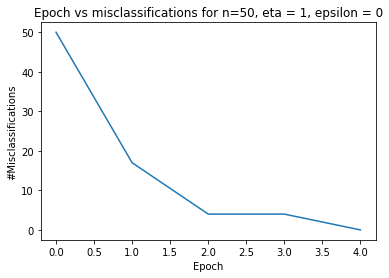

In [14]:
#n = 50, eta = 1, epsilon = 0
n = 50
eta = 1
epsilon = 0

#Training model
W, misclassifications_counter = PTA(trainX, trainY, eta, epsilon, n)
plotMisclassifications(misclassifications_counter, "Epoch vs misclassifications for n=50, eta = 1, epsilon = 0")
print("Misclassifications percentage over training data: ", misclassifications_counter[len(misclassifications_counter) - 1] / n * 100)

In [15]:
#Validation using test data
error = testModel(testX, testY, W)
print("Misclassifications percentage over test data: ", error / 10000 * 100)

Misclassifications percentage over test data:  45.6


<b>Observations:</b>
<ul>
    <li>
        The training data for n = 50 converges to error = 0 in very less number of epochs.
    </li>
    <li>
        However, the error rate on the test data is 45.6%. This could be due to the fact the training size is very less and the information learnt from the subset of example for n = 50 could be vastly different from the test data.
    </li>
</ul>

Training for n = 1000, eta = 1, epsilon = 0 and testing the data using the test data.

Misclassifications percentage over training data:  0.0


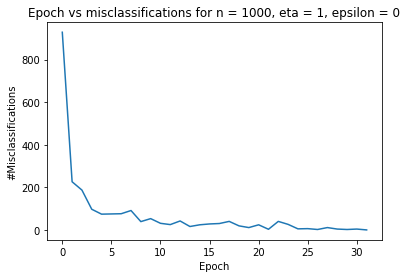

In [16]:
#n = 1000, eta = 1, epsilon = 0
n = 1000
eta = 1
epsilon = 0

#Training model
W, misclassifications_counter = PTA(trainX, trainY, eta, epsilon, n)
plotMisclassifications(misclassifications_counter, "Epoch vs misclassifications for n = 1000, eta = 1, epsilon = 0")
print("Misclassifications percentage over training data: ", misclassifications_counter[len(misclassifications_counter) - 1] / n * 100)

In [17]:
#Validation using test data
error = testModel(testX, testY, W)
print("Misclassifications percentage over test data: ", error / 10000 * 100)

Misclassifications percentage over test data:  17.77


<b>Observations:</b>
<ul>
    <li>
        The error rate converges to 0 for the training data of size n = 1000.
    </li>
    <li>
        The error rate on the test data is 17.77%. This is lesser than the 45.6% obtained in Step 3f. This could be attributed to the fact the Network has trained on more information and thus the weights have been updated appropriately.
    </li>
</ul>

Training for n = 60000, eta = 1, epsilon = 0 and testing the data using the test data.
<br>
Note: The maximum number of epochs is set to 500 since the algorithm didn't converge in the trial runs.

Misclassifications percentage over training data:  13.718333333333332


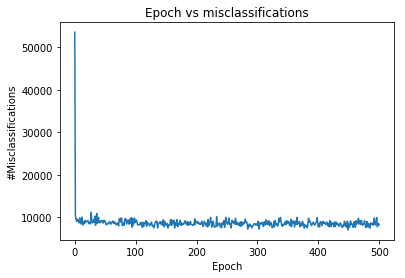

In [18]:
#n = 60000, eta = 1, epsilon = 0
n = 60000
eta = 1
epsilon = 0

#Training model
W, misclassifications_counter = PTA(trainX, trainY, eta, epsilon, n, 500)
plotMisclassifications(misclassifications_counter)
print("Misclassifications percentage over training data: ", misclassifications_counter[len(misclassifications_counter) - 1] / n * 100)

In [24]:
#Printing the last 20 misclassifications count
misclassifications_counter[-20:]

[8179,
 7704,
 8540,
 7945,
 7452,
 8690,
 8413,
 8527,
 8676,
 8147,
 8420,
 9851,
 8409,
 8232,
 8925,
 9968,
 7791,
 8324,
 8578,
 8231]

<b>Observations:</b>
<ul>
    <li>
        The algorithm doesn't converge at 500 epochs. It can be seen that the misclassifications count hovers around 8000 (between 7000 and 9000). This could either mean that the learning rate is too large at 500 epochs to learn significantly or that the model is not powerful enough to learn the weights for the training samples. The first one could be rectified by reducing the learning rate at higher epochs. For the latter, a more powerful network with more layers and/or more neurons per layer can be designed.
    </li>
    <li>
        The error rate on the training data has dropped to 13.71%.
    </li>
</ul>

In [19]:
#Validation using test data
error = testModel(testX, testY, W)
print("Misclassifications percentage over test data: ", error / 10000 * 100)

Misclassifications percentage over test data:  13.87


<b>Observations:</b>
<ul>
    <li>
        The error rate on the test data has dropped to 13.87%. This could be attributed to training on the entirety of the training data. As stated in the MNIST data description, the second half of the training data had more obscure data which was also included in the training. This has significantly reduced the error rate on the test data.
    </li>
</ul>

Based on the observations above, which concluded that the PTA doesn't converge at 500 epochs, the average error at that point of training is 13.33% (misclassifications_counter[epoch - 1] / n ~ 8000 / 60000).
<br>
Thus, the epsilon is set to 0.133 to generate 3 models with random initial weights and testing using the test data.

<b>Run 1</b>

Misclassifications percentage over training data:  12.889999999999999


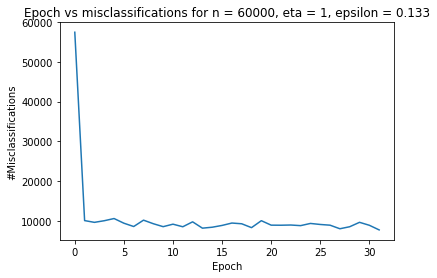

In [25]:
#n = 60000, eta = 1, epsilon = 0.133
n = 60000
eta = 1
epsilon = 0.133 # ~ 8000 / 60000

#Training model
W, misclassifications_counter = PTA(trainX, trainY, eta, epsilon, n, 500)
plotMisclassifications(misclassifications_counter, "Epoch vs misclassifications for n = 60000, eta = 1, epsilon = 0.133")
print("Misclassifications percentage over training data: ", misclassifications_counter[len(misclassifications_counter) - 1] / n * 100)

In [26]:
#Validation using test data
error = testModel(testX, testY, W)
print("Misclassifications percentage over test data: ", error / 10000 * 100)

Misclassifications percentage over test data:  16.3


<b>Observations:</b>
<ul>
    <li>
        The algorithm has terminated for epoch ~ 35.
    </li>
    <li>
        The training error has been reduced to 12.89% which is marginally lesser than the error obtained for 500 epochs.
    </li>
    <li>
        However, the test error has increased to 16.3%. This could indicate slight overfitting in the model.
    </li>
</ul>

<b>Run 2</b>

Misclassifications percentage over training data:  13.211666666666666


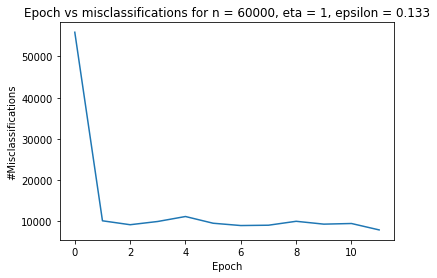

In [30]:
#n = 60000, eta = 1, epsilon = 0.133
n = 60000
eta = 1
epsilon = 0.133 # ~ 8000 / 60000

#Training model
W, misclassifications_counter = PTA(trainX, trainY, eta, epsilon, n, 500)
plotMisclassifications(misclassifications_counter, "Epoch vs misclassifications for n = 60000, eta = 1, epsilon = 0.133")
print("Misclassifications percentage over training data: ", misclassifications_counter[len(misclassifications_counter) - 1] / n * 100)

In [31]:
#Validation using test data
error = testModel(testX, testY, W)
print("Misclassifications percentage over test data: ", error / 10000 * 100)

Misclassifications percentage over test data:  16.86


<b>Observations:</b>
<ul>
    <li>
        The algorithm has terminated faster i.e., for epoch < 12.
    </li>
    <li>
        The training error has gone up marginally to 13.21%.
    </li>
    <li>
        The test error remains around 16.86%.
    </li>
</ul>

<b>Run 3</b>

Misclassifications percentage over training data:  12.828333333333333


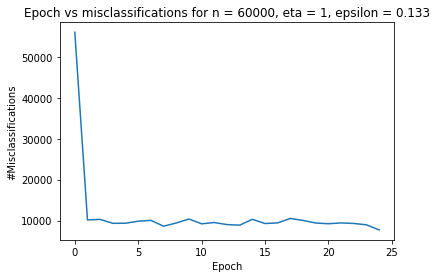

In [33]:
#n = 60000, eta = 1, epsilon = 0.133
n = 60000
eta = 1
epsilon = 0.133 # ~ 8000 / 60000

#Training model
W, misclassifications_counter = PTA(trainX, trainY, eta, epsilon, n, 500)
plotMisclassifications(misclassifications_counter, "Epoch vs misclassifications for n = 60000, eta = 1, epsilon = 0.133")
print("Misclassifications percentage over training data: ", misclassifications_counter[len(misclassifications_counter) - 1] / n * 100)

In [34]:
#Validation using test data
error = testModel(testX, testY, W)
print("Misclassifications percentage over test data: ", error / 10000 * 100)

Misclassifications percentage over test data:  16.150000000000002


<b>Observations:</b>
<ul>
    <li>
        The algorithm has terminated at ~ 25 epochs. This seems to be similar to the average of epochs for the given threshold.
    </li>
    <li>
        The training error has reduced further to 12.82%.
    </li>
    <li>
        The test error is around 16%. This leads to the conclusion that the model is yet to learn important characteristics from the training data to classify better on the test data. As mentioned earlier, this could be achieved by either allowing the network to train for more epochs or by designing more powerful networks.
    </li>
</ul>